# Homework 02

In this assignment you will demonstrate your mastery selecting and transforming data using the `numpy` and `pandas` Python libraries. You are welcome to refer to the [`numpy` documentation](https://numpy.org/doc/stable/) and [`pandas` documentation](https://pandas.pydata.org/docs/user_guide/index.html) to help solve the problems, as well as any class materials such as Prepare and worked examples resources.

We will manually grade your code to check that you are taking advantage of the features of `numpy` and `pandas`, as opposed to using `for` loops. All questions have 2 manually graded points to make sure libraries are correctly being used and the implementation does not use `for` loops.

In [4]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install scikit-learn
%pip install scikit-learn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 122 kB 57.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 30.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because 

In [6]:
# Run but do not modify this code to import libraries

# Import numpy and pandas
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
print(plt.get_backend())

module://matplotlib_inline.backend_inline


## Part 1: Nearby Points
A classic problem in computational geometry with many applications in machine learning is *nearest neighbor search* in which we are given a set of points and a query (which is also a point) and asked to find the closest points to the query. The problem has many variants which are used for classification in machine learning and collaborative filtering in recommender systems. In this part you will code a few variants using `numpy`.

Start by running the code cell below. It will generate 100 random points (in two dimensions) as a 100 row by 2 column `numpy` array `points`. Each row corresponds to a point, the first column (column index 0) contains the x-value, and the second column (column index 1) contains the y-value. Similarly, the code generates a random query point as a one-dimensional `numpy` array `query` of length two, where the first value is the x-value and the second is the y-value. This data is visualized in a scatter plot where `points` are represented as smaller blue dots and `query` is represented as a larger orange dot.

Throughout this part we will use Euclidean distance (standard high school geometry distance). Recall that the distance formula between two points $(x_1, y_1)$ and $(x_2, y_2)$ is $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$.

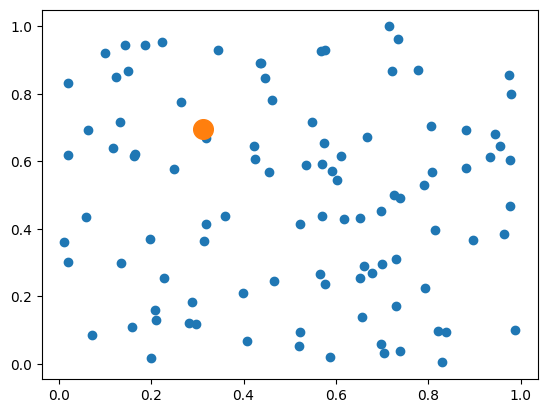

In [8]:
# Run but do not modify this code
n = 100
np.random.seed(0) # so you get the same results each time

points = np.random.rand(n, 2)
query = np.random.rand(2)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(query[0], query[1], s=200)

plt.show()

### Question 1: k-nearest neighbors (6 points, 2 manual points)
The code cell below defines a `get_knn` function that takes `points`, an array of points of any length, and `query`, a single point, similar to the above, along with a positive integer parameter `k`. It should return the `k` nearest neighbors of `query` among `points`. It should return something of type `numpy.ndarray` ([doc](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)) with shape `(k, 2)` since we're returning `k` points each having `dimension=2`. The `k` nearest neighbors are the `k` points of minimum distance to `query`. 

The function is not correctly implemented (currently it just returns the first `k` points). Fix the implementation of `get_knn` so that it works as intended. You may find the `numpy` `argsort` function to be helpful, you can find its [documentation here](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html).

You can run the next code cell to visualize your results. It will draw orange lines from `query` to the `k=10` points returned by your `get_knn` function. You do not need to report anything else for this question beyond your implementation, but please run the visualization to show your results.

In [9]:
def get_knn(points, query, k):
    # Put your code for question 1 here.
    return points[:k]

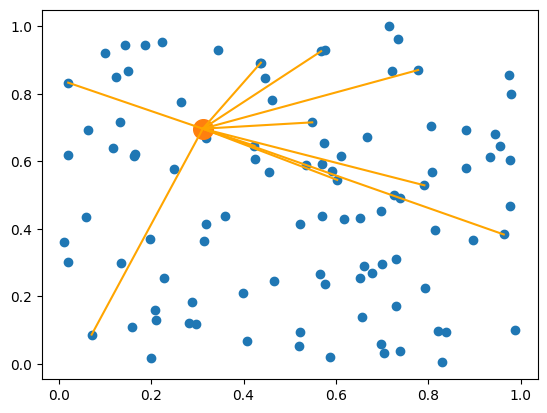

In [10]:
# Run but do not modify this code to test your 
# implementation and visualize your final result
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(query[0], query[1], s=200)

knn = get_knn(points, query, 10)
for point in knn:
    plt.plot(*zip(query, point), color='orange')

plt.show()

## Question 2: Points within radius (6 points, 2 manual points)
The code cell below defines a `get_ball` function that takes `points`, an array of points of any length, and `query`, a single point, similar to the above, along with a positive integer parameter `r`. It should return *all* of the `points` that are within distance `r` of `query` (that is, points within a circle of radius `r` around `query`, including points exactly `r` away from `query`). It should return something of type `numpy.ndarray` with shape `<?, 2>` ([doc](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)). 

The function is not correctly implemented (currently it just returns the first point). Fix the implementation of `get_ball` so that it works as intended.

You can run the next code cell to visualize your results. It will draw orange lines from `query` to the points within distance `r=0.5` from `query` returned by your `get_ball` function. You do not need to report anything else for this question beyond your implementation, but please run the visualization to show your results.

In [ ]:
def get_ball(points, query, r):
    # Put your code for question 2 here.
    return points[:1]

In [ ]:
# Run but do not modify this code to test your 
# implementation and visualize your final result
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(query[0], query[1], s=200)

ball = get_ball(points, query, 0.5)

for point in ball:
    plt.plot(*zip(query, point), color='orange')

plt.show()

## Part 2: Election
In this part, you will practice generating statistics at different granularities from the 2020 presidential election. As a reminder, a statistic is a number computed from a data set.

We will work with the `president_2020.csv` dataset, imported below as a `pandas` Dataframe called `df`. It contains the number of votes cast for the Democratic and Republican political party candidates for president in the 2020 election in each state. For the purposes of this dataset, the District of Columbia is listed as a state. The `d_votes` column contains the number of votes for the democratic candidate and the `r_votes` column contains the number of votes for the republican candidate. Note that exact values may differ slightly from official certified counts; please use this dataset for your analysis.

In [ ]:
# Run but do not modify this cell to import the data and view the first five rows
df = pd.read_csv("president_2020.csv", index_col=0)
df.head()

### Question 3 (6 points, 2 manual points)
Compute the following three new columns and add them to the dataframe `df`. For any percents, you should express the values as a fraction between 0 and 1 (e.g., 0.5 for 50%).

1. A `total` column containing the total number of votes cast for democratic or republican candidates in each state.
2. A `d_percent` column containing the percent of the `total` votes that were cast for the democratic candidate in each state. 
3. A `r_percent` column containing the percent of the `total` votes that were cast for the republican candidate in each state.

In [ ]:
# Put your code for question 3 here
df["total"] = ...
df["d_percent"] = ...
df["r_percent"] = ...

In [ ]:
# Run this code to see the first five rows
# of your dataframe with the new columns
df.head()

### Question 4 (12 points, 2 per part and 2 manual grading)

Answer the following questions about the dataset. For some questions you may find the `pandas` `idxmax()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html)) and `idxmin()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)) methods to be helpful (though they are not necessary).

1. How many total votes are there across all of the states? Put this in the variable `q4_1`.

2. Which party received more total votes, and how many more did they receive than their opponent? In `q4_2p` put the string `'d'` for democratic or `'r'` for republican and put the number of votes in `q4_2v`.

3. For each party, in how many states did they receive more votes than their opponent? Use `q4_3d` for democratic and `q4_3r` for republican.

4. Which state had the largest margin of victory in terms of the difference in the number of votes cast for the two candidates, and what is that difference? Use `q4_4s` for the state and `q4_4d` for the difference.

5. Which state had the smallest margin of victory in terms of the difference in the number of votes cast for the two candidates and what is that difference? Use `q4_5s` for the state and `q4_5d` for the difference.

In [ ]:
# Put your code for question 4 here. Feel free to add 
# additional code cells as necessary.
q4_1 = ...
q4_2p = ...
q4_2v = ...
q4_3d = ...
q4_3r = ...
q4_4s = ...
q4_4d = ...
q4_5s = ...
q4_5d = ...

### Question 5 (10 points, 2 per part and 2 manual grading)
Answer the following questions about the dataset. It may be helpful (though not necessary) to recall that you can get the explicit indices of a `pandas` Dataframe or Series with the `.index` attribute ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html)).

1. List all of the states in which more than 60% of votes were cast for the democratic candidate. Save the result in a `numpy.ndarray` of strings named `q5_1`. (p.s., you may notice that there is a `dtype=object` on the variable calculated - don't worry, this answer format is acceptable.)

2. List all of the states in which more than 60% of votes were cast for the republican candidate. Save the result in a `numpy.ndarray` of strings named `q5_2`.

3. List all of the states with more than 2 million total votes, of which more than 60% were cast for the democratic candidate. Save the result in a `numpy.ndarray` of strings named `q5_3`.

4. List all of the states with more than 2 million total votes, of which more than 60% were cast for the republican candidate. Save the result in a `numpy.ndarray` of strings named `q5_4`.

In [ ]:
# Put your code for question 5 here. Feel free to add 
# additional code cells as necessary
q5_1 = ...
q5_2 = ...
q5_3 = ...
q5_4 = ...

### Question 6 (4 points, 2 manual points)

Having now explored the data in various ways, in this question, you should analyze the data yourself by designing your own statistic. It can be an integer or float but should be a single number (as opposed to a number per state). Put the result of your analysis in the variable `statistic`. Then, explain your statistic in the written part of this question. Be precise in what you did. What data did you use? What did you not use? What kind of statistic is it? What does that value tell you about the data?

**Grading of this question**: It will be graded using an ESNU rubric as follows:
- Exemplary - Work that meets all requirements and displays full mastery of all learning goals for this question. And the code and write-up are clean and easy to understand.
- Satisfactory - Work that meets all requirements and displays at least partial mastery of all learning goals as well as full mastery of core learning goals. In other words, it is not an E, but it fulfills the requirements, including (but not necessarily only) the code matches what the write-up claims it is.
- Not Yet - Work that does not meet some requirements and/or displays developing or incomplete mastery of at least some learning goals. For example, the code and write-up do not match, or the write-up states something incorrectly.
- Unasessable - Work that is missing, does not demonstrate meaningful effort, or does not provide enough evidence to determine a level of mastery.

In [ ]:
# Put your code for question 6 here. Feel free to add 
# additional code cells as necessary
statistic = ...

# Leave these here to help with grading.
print(type(statistic))
print(statistic)

<!-- BEGIN QUESTION -->

### Answer 6: Written portion

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## AI Disclosure

Use the [Artificial Intelligence Disclosure (AID) Framework](https://crln.acrl.org/index.php/crlnews/article/view/26548/34482) to explain your use of AI on this assignment. Other headings you can use include:
- *Debugging*: Using AI to help you fix your code so that it works. You should state how you used it for this purpose.

Here are some examples:

*Artificial Intelligence Tools*: ChatGPT v5 via chatgpt.com. *Conceptualization*: I gave chatgpt.com the election data set and asked it for ideas on interesting statistics I could get from the data. *Methodology*: I asked it for help on how to write the code to get the statistic I chose, but I wrote the code myself. *Writing—Review & Editing*: I wrote out my explanation for what the statistic meant, then gave that text and the rubric to chatgpt and asked it to give me feedback on how to update the explanation to conform to the rubric.

*Artificial Intelligence Tools*: ChatGPT v4o via  DukeGPT. *Information Collection*: DukeGPT was used to find the function needed to get the index value of the maximum value of a Series and the syntax needed to filter rows in a pandas dataframe using multiple columns. *Debugging*: DukeGPT was used to help me find a bug in my code for Q1 where I copied in the code and error, stated what the code should do, and asked for help.



**Solution:** Answer is here

## Submitting

You should make sure any code that you write to answer the questions is included in this notebook. You are **required** to go to the Kernel option and choose **"Restart & Run All"**  before submission. Double check that your entire notebook runs correctly and generates the expected output. Finally, make sure to save your work (timestamp at the top tells you the last checkpoint and whether there are unsaved changes). When you finish, submit your assignment at Gradescope. **Submissions not prepared correctly as above will lose points.**